In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


# => to fetch the images from the directory for creating the training dataset

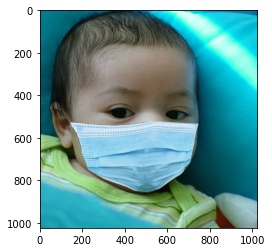

In [2]:
Datadirectory = "Dataset/"  # training dataset
Classes = ["Face_Mask", "No_Mask"]  # list of classes
for category in Classes:
    path = os.path.join(Datadirectory, category) # join
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
  

In [3]:
training_Data = [] # data
img_size=224 # imagenet=> 224 * 224

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num=Classes.index(category)  # 0 1,  #labels
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
            

In [4]:
create_training_Data()

In [5]:
print(len(training_Data))

1950


In [6]:
import random
random.shuffle(training_Data)


In [7]:
X=[]  # data, feature
y=[]  # label

for features,label in training_Data:
    X.append(features)
    y.append(label)

    
X=np.array(X).reshape(-1,img_size,img_size,3)


In [8]:
X.shape

(1950, 224, 224, 3)

In [9]:
X=X/255.0; #we are normalizing it

In [10]:
Y=np.array(y)

# => training of deep learning model

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [13]:
model=tf.keras.applications.mobilenet.MobileNet()  # pre-trained model

In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [15]:
base_input=model.layers[0].input

In [16]:
base_output=model.layers[-4].output

In [17]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer) # 0, 1
final_ouput=layers.Activation('sigmoid')(final_output)

In [18]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [19]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [20]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
new_model.fit(X,Y,epochs=10,validation_split=0.1)

Epoch 1/10
55/55 [==============================] - 232s 4s/step - loss: 0.1959 - accuracy: 0.9812 - val_loss: 0.4799 - val_accuracy: 0.9641
Epoch 2/10
55/55 [==============================] - 227s 4s/step - loss: 0.0265 - accuracy: 0.9983 - val_loss: 2.1189 - val_accuracy: 0.8564
Epoch 3/10
55/55 [==============================] - 235s 4s/step - loss: 0.0096 - accuracy: 0.9989 - val_loss: 0.0782 - val_accuracy: 0.9949
Epoch 4/10
55/55 [==============================] - 231s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
55/55 [==============================] - 224s 4s/step - loss: 0.0882 - accuracy: 0.9932 - val_loss: 1.1828 - val_accuracy: 0.9179
Epoch 6/10
55/55 [==============================] - 230s 4s/step - loss: 2.4651 - accuracy: 0.8353 - val_loss: 7.6637 - val_accuracy: 0.4974
Epoch 7/10
55/55 [==============================] - 274s 5s/step - loss: 0.9714 - accuracy: 0.9339 - val_loss: 7.5855 - val_accuracy: 0.5026
Epoch

In [22]:
history = new_model.history.history

In [23]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # training loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # training accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

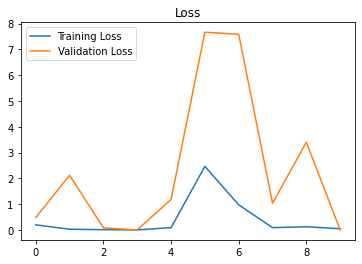

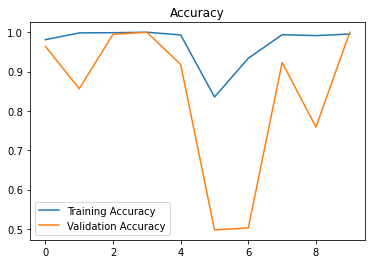

In [24]:
plot_metrics(history)

In [25]:
new_model.save('my_model.h5')

In [26]:
new_model=tf.keras.models.load_model('my_model.h5')

# => checking the images for prediction after training the model

# => image with mask

In [27]:
frame = cv2.imread('Dataset/Face_Mask/00006_Mask.jpg')

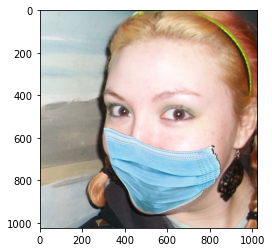

In [28]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [29]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0) # need fourth dimension
final_image=final_image/255.0

In [30]:
prediction=new_model.predict(final_image)

In [31]:
prediction

array([[-25.09781]], dtype=float32)

In [32]:
if prediction<0:
    print('With Mask')
else:
    print('No Mask')

With Mask


# => image without mask

In [37]:
frame = cv2.imread('Dataset/No_Mask/00006.png')

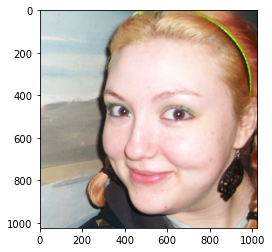

In [38]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [39]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0) # need fourth dimension
final_image=final_image/255.0

In [40]:
prediction=new_model.predict(final_image)

In [41]:
prediction

array([[61.262432]], dtype=float32)

In [42]:
if prediction<0:
    print('With Mask')
else:
    print('No Mask')

No Mask
